# Data process

In [1]:
from sklearn import feature_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
data_train = pd.read_csv('D:/JupyterLab/AKI/Data/data_preprocess/data_train.csv', encoding='utf-8')
data_test = pd.read_csv('D:/JupyterLab/AKI/Data/data_preprocess/data_test.csv', encoding='utf-8')
data_external = pd.read_csv('D:/JupyterLab/AKI/Data/data_external.csv', encoding='utf-8')

In [3]:
data_train.columns

Index(['Unnamed: 0', 'aki_stage', 'Age', 'Weight', 'Glucose', 'SBP', 'DBP',
       'SpO2', 'RBC', 'WBC', 'Hemoglobin', 'LDL_C', 'Potassium', 'Sodium',
       'Urineoutput', 'SAPSII', 'SIRS', 'SOFA', 'ARB', 'ARNI',
       'Loop diuretics', 'ACEI', 'Beta blocker', 'BUN', 'SCR',
       'Congestiveheartfailure', 'Diabetes', 'Malignancy', 'Hypertension',
       'AIP', 'Gender_M'],
      dtype='object')

In [4]:
from collections import Counter
 #def column
column_name = ['Age', 'Weight', 'Glucose', 'SBP', 'DBP',
               'SpO2', 'SCR', 'Urineoutput', 'SAPSII', 'SIRS', 'SOFA',  'ARNI',
               'Loop diuretics','Congestiveheartfailure', 'WBC', 'BUN',  'AIP', ]
event_column = 'aki_stage'

X_train, y_train = data_train[column_name], data_train[event_column]
X_test, y_test = data_test[column_name], data_test[event_column]
X_test_external, y_test_external = data_external[column_name], data_external[event_column]

# Load model

In [7]:
import tensorflow as tf
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [8]:
#加载模型
# Load MLP Model
MLP_model = load(r'D:\JupyterLab\AKI\Model\MLP_model4.joblib')
#
## Load ADB Model
ADB_model = load( r'D:\JupyterLab\AKI\Model\AdaBoost_model4.joblib')
#
## Load ANN Model
ANN_model = load(r'D:\JupyterLab\AKI\Model\ANN_model4.joblib')
#
## Load Bagging Model
Bagging_model = load(r'D:\JupyterLab\AKI\Model\Bagging_model4.joblib')
#
## Load en Model
Elastic_Net_Regression_model= load(r'D:\JupyterLab\AKI\Model\Elastic_Net_Regression_model4.joblib')
#
## Load knn Model
KNN_model= load( r'D:\JupyterLab\AKI\Model\KNN_model4.joblib')
#
## Load Logistic Model
Logistic_model= load(r'D:\JupyterLab\AKI\Model\Logistic_model4.joblib')
#
## Load Ridege Model
Rideg_model= load(r'D:\JupyterLab\AKI\Model\Ridge_model4.joblib')
#
## Load SGD Model
SGD_model= load(r'D:\JupyterLab\AKI\Model\SGD_model4.joblib')
#
## Load SVM Model
SVM_model= load(r'D:\JupyterLab\AKI\Model\SVM_model_rbf4.joblib')
#
## Load xgb Model
XGB_model= load(r'D:\JupyterLab\AKI\Model\XGBoost_model5.joblib')
#
## Load RF Model
RF_model= load(r'D:\JupyterLab\AKI\Model\RF_model4.joblib')
#
## Load CAB Model
Catboost_model= load(r'D:\JupyterLab\AKI\Model\Catboost_model4.joblib')

In [9]:
# 定义模型字典
models = {
    "MLP": MLP_model,
    "AdaBoost": ADB_model,
    "Bagging": Bagging_model,
    "Elastic Net Regression": Elastic_Net_Regression_model,
    "ANN": ANN_model,
    "Random Forest": RF_model,
    "KNN": KNN_model,
    "Catboost": Catboost_model,
    "Logistic": Logistic_model,
    "Ridge": Rideg_model,
    "SGD": SGD_model,
    "SVM": SVM_model,
    "XGBoost": XGB_model
}

In [10]:
import matplotlib.pyplot as plt
from sklearn.utils import check_consistent_length
from sklearn.calibration import calibration_curve
from sklearn.metrics import (roc_curve, auc, brier_score_loss, 
                            accuracy_score, recall_score, 
                            precision_score, f1_score, 
                            confusion_matrix)

### Internal

In [ ]:
# 生成预测结果
predictions = {}

for model_key, model_ in models.items():
    print(f"\n正在处理模型: {model_key}")
    try:
       
        if hasattr(model_, "predict_proba"):
            predictions[f"{model_key}"] = model_.predict_proba(X_test)[:, 1]
        else:
            predictions[f"{model_key}"]  = model_.decision_function(X_test)

  
    
    except Exception as e:
        print(f"处理模型 {model_key} 时出错: {str(e)}")
        continue    


正在处理模型: MLP

正在处理模型: AdaBoost

正在处理模型: Bagging

正在处理模型: Elastic Net Regression

正在处理模型: ANN

正在处理模型: Random Forest

正在处理模型: KNN

正在处理模型: Catboost

正在处理模型: Logistic

正在处理模型: Ridge

正在处理模型: SGD

正在处理模型: SVM

正在处理模型: XGBoost


### External

In [12]:
# 生成预测结果
predictions_external = {}

for model_key, model_ in models.items():
    print(f"\n正在处理模型: {model_key}")
    try:
        # 获取预测值
        if hasattr(model_, "predict_proba"):
            predictions_external[f"{model_key}"] = model_.predict_proba(X_test_external)[:, 1]
        else:
            predictions_external[f"{model_key}"]  = model_.decision_function(X_test_external)
            
    except Exception as e:
        print(f"处理模型 {model_key} 时出错: {str(e)}")
        continue


正在处理模型: MLP

正在处理模型: AdaBoost

正在处理模型: Bagging

正在处理模型: Elastic Net Regression

正在处理模型: ANN

正在处理模型: Random Forest

正在处理模型: KNN

正在处理模型: Catboost

正在处理模型: Logistic

正在处理模型: Ridge

正在处理模型: SGD

正在处理模型: SVM

正在处理模型: XGBoost


## ROC曲线

### 外部ROC

<function matplotlib.pyplot.show(close=None, block=None)>

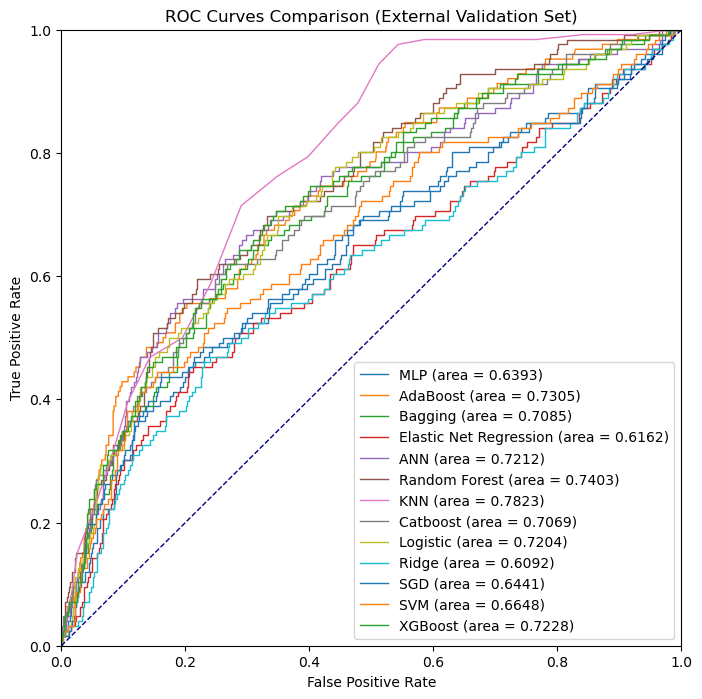

In [ ]:
# 创建一个图形对象
plt.figure(figsize=(8, 8))


for model_key, model_name in models.items():
   
    prediction = predictions_external[model_key]
    fpr, tpr, thresholds = roc_curve(y_test_external, prediction)
    roc_auc_test = auc(fpr, tpr)
    roc_auc = auc(fpr, tpr)
    
    
    plt.plot(fpr, tpr, lw=1, label=f'{model_key} (area = {roc_auc:.4f})')
    

plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

# 设置图形属性
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curves Comparison (External Validation Set)")
plt.legend(loc="lower right")

#plt.savefig('D:/JupyterLab/AKI/Result/Fig/external_set_roc_curves5.27.pdf', 
#          format='pdf', dpi=800, bbox_inches='tight')
plt.show

### 内部ROC

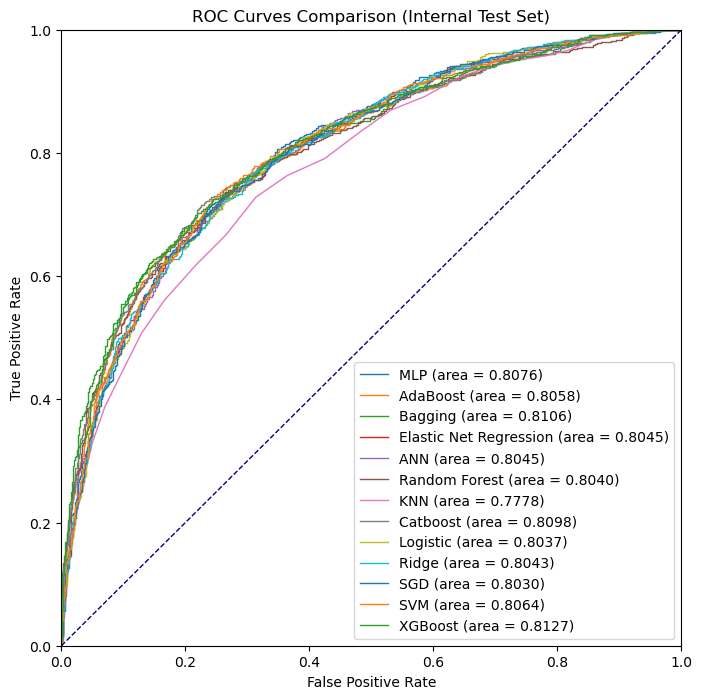

In [12]:
# 创建一个图形对象
plt.figure(figsize=(8, 8))

# 按顺序遍历每个模型
for model_key, model_name in models.items():
    # 获取当前模型的预测结果
    prediction = predictions[model_key]
    fpr, tpr, thresholds = roc_curve(y_test, prediction)
    roc_auc_test = auc(fpr, tpr)
    roc_auc = auc(fpr, tpr)
    
    # 绘制当前模型的 ROC 曲线
    plt.plot(fpr, tpr, lw=1, label=f'{model_key} (area = {roc_auc:.4f})')
    
# 绘制对角线作为参考
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')

# 设置图形属性
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curves Comparison (Internal Test Set)")
plt.legend(loc="lower right")

plt.savefig('D:/JupyterLab/AKI/Result/Fig/test_set_roc_curves5.27.pdf', 
           format='pdf', dpi=800, bbox_inches='tight')

## DCA

In [48]:
# 1. 计算模型带来的净获益
def calculate_net_benefit_model(thresh_group, y_pred_score, y_label):
    net_benefit_model = np.array([])
    for thresh in thresh_group:
        y_pred_label = y_pred_score > thresh
        tn, fp, fn, tp = confusion_matrix(y_label, y_pred_label).ravel()
        n = len(y_label)
        net_benefit = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_benefit_model = np.append(net_benefit_model, net_benefit)
    return net_benefit_model

In [49]:
# 2. 计算treat all策略带来的净获益
def calculate_net_benefit_all(thresh_group, y_label):
    net_benefit_all = np.array([])
    tn, fp, fn, tp = confusion_matrix(y_label, y_label).ravel()
    total = tp + tn
    for thresh in thresh_group:
        net_benefit = (tp / total) - (tn / total) * (thresh / (1 - thresh))
        net_benefit_all = np.append(net_benefit_all, net_benefit)
    return net_benefit_all

In [50]:
#构造一个分类效果不是很好的模型
thresh_group = np.arange(0,1,0.001)

### 内部数据

In [23]:
predictions['Bagging']

array([0.49499298, 0.58331802, 0.6945512 , ..., 0.52771816, 0.22800495,
       0.78444385])

In [24]:
#内部数据
prediction = predictions[model_key]
fpr, tpr, thresholds = roc_curve(y_test, prediction)

In [25]:
net_benefit_model_XGBoost = calculate_net_benefit_model(thresh_group, predictions['XGBoost'], y_test)
net_benefit_model_ANN = calculate_net_benefit_model(thresh_group, predictions['ANN'], y_test)
net_benefit_model_KNN = calculate_net_benefit_model(thresh_group, predictions['KNN'], y_test)
net_benefit_model_Bagging = calculate_net_benefit_model(thresh_group, predictions['Bagging'], y_test)
net_benefit_model_AdaBoost = calculate_net_benefit_model(thresh_group, predictions['AdaBoost'], y_test)
net_benefit_model_Random_Forest = calculate_net_benefit_model(thresh_group, predictions['Random Forest'], y_test)
net_benefit_model_Logistic = calculate_net_benefit_model(thresh_group, predictions['Logistic'], y_test)
net_benefit_model_Catboost = calculate_net_benefit_model(thresh_group, predictions['Catboost'], y_test)

In [26]:
net_benefit_all = calculate_net_benefit_all(thresh_group, y_test)

### 绘图

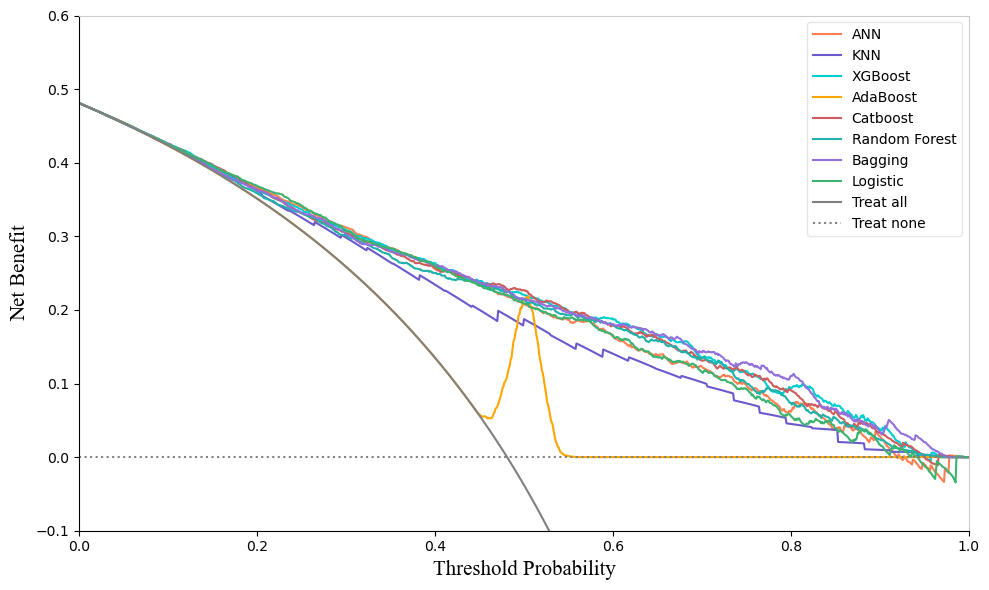

In [20]:
#内部数据DCA曲线
fig, ax = plt.subplots(figsize=(10, 6))  # 调整图表大小

# 定义更具区分度的颜色方案
colors = [
    '#FF7F50',  # 珊瑚红
    '#6A5ACD',  # 石板蓝
    '#00CED1',  # 暗青色
    '#FFA500',  # 橙色
    '#CD5C5C',  # 印度红
    '#20B2AA',  # 亮钢蓝
    '#9370DB',  # 暗紫罗兰色
    '#3CB371',  # MediumSeaGreen
]

# 绘制模型曲线
models = [
    (net_benefit_model_ANN, 'ANN'),
    (net_benefit_model_KNN, 'KNN'),
    (net_benefit_model_XGBoost, 'XGBoost'),
    (net_benefit_model_AdaBoost, 'AdaBoost'),
    (net_benefit_model_Catboost, 'Catboost'),
    (net_benefit_model_Random_Forest, 'Random Forest'),
    (net_benefit_model_Bagging, 'Bagging'),
    (net_benefit_model_Logistic, 'Logistic')
]

# 使用循环绘制模型曲线
for i, (model, label) in enumerate(models):
    ax.plot(thresh_group, model, color=colors[i], label=label, lw=1.5)  # 增加线宽

# 绘制参考线
ax.plot(thresh_group, net_benefit_all, color='#808080', label='Treat all', lw=1.5)  # 深灰色
ax.plot((0, 1), (0, 0), color='#808080', linestyle=':', label='Treat none', lw=1.5)

# 图表配置
ax.set_xlim(0, 1)
ax.set_ylim(-0.1, 0.6)
ax.set_xlabel(
    xlabel='Threshold Probability',
    fontdict={'family': 'Times New Roman', 'fontsize': 15}
)
ax.set_ylabel(
    ylabel='Net Benefit',
    fontdict={'family': 'Times New Roman', 'fontsize': 15}
)

# 美化图表边框
ax.spines['right'].set_color((0.8, 0.8, 0.8))
ax.spines['top'].set_color((0.8, 0.8, 0.8))

# 优化图例
legend = ax.legend(loc='upper right', frameon=True)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('#e0e0e0')

plt.tight_layout()  # 确保布局紧凑
plt.savefig('D:/JupyterLab/AKI/Result/Fig/DCA_internal5.27.pdf', 
            format='pdf', dpi=300, bbox_inches='tight')

plt.show()

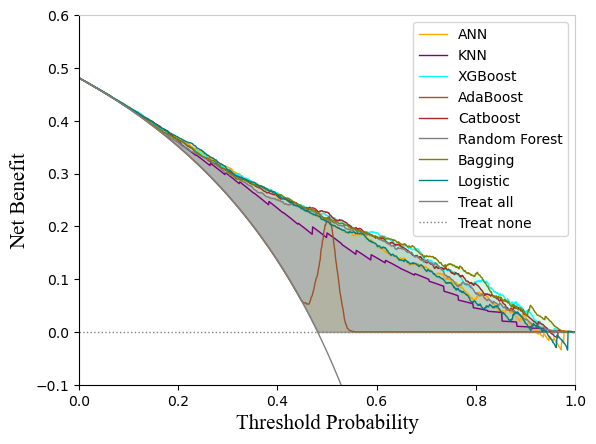

In [20]:
##内部数据DCA曲线
#fig, ax = plt.subplots()
#
##  color = 十六进制颜色改变线颜色
#
#ax.plot(thresh_group, net_benefit_model_ANN, color='orange', label='ANN', lw=1)
#ax.plot(thresh_group, net_benefit_model_KNN, color='purple', label='KNN', lw=1)
#ax.plot(thresh_group, net_benefit_model_XGBoost, color='cyan', label='XGBoost', lw=1)
#ax.plot(thresh_group, net_benefit_model_AdaBoost, color='sienna', label='AdaBoost', lw=1)
#ax.plot(thresh_group, net_benefit_model_Catboost, color='brown', label='Catboost', lw=1)
#ax.plot(thresh_group, net_benefit_model_Random_Forest, color='gray', label='Random Forest', lw=1)
#ax.plot(thresh_group, net_benefit_model_Bagging, color='olive', label='Bagging', lw=1)
#ax.plot(thresh_group, net_benefit_model_Logistic, color='teal', label='Logistic', lw=1)
#
#
#ax.plot(thresh_group, net_benefit_all, color = 'grey',label = 'Treat all', lw = 1)
#ax.plot((0, 1), (0, 0), color = 'grey', linestyle = ':', label = 'Treat none', lw = 1)
#
##Fill，显示出模型较于treat all和treat none好的部分
##x1 = np.maximum(net_benefit_all, 0)
##y1 = np.maximum(net_benefit_model_ANN, x1)
##y3 = np.maximum(net_benefit_model_KNN, x1)
##y4 = np.maximum(net_benefit_model_XGBoost, x1)
##y5 = np.maximum(net_benefit_model_AdaBoost, x1
##y6 = np.maximum(net_benefit_model_Catboost, x1)
##y7 = np.maximum(net_benefit_model_Random_Forest, x1)
##y8 = np.maximum(net_benefit_model_Bagging, x1)
##y9 = np.maximum(net_benefit_model_Logistic, x1)
#
## 定义颜色列表，用于填充不同模型
#fill_colors = ['#FFA50033', '#80008033', '#00FFFF33', '#FFD70033', '#A0522D33', '#2F4F4F33', '#32CD3233', '#9932CC33']
#
#x1 = np.maximum(net_benefit_all, 0)
#models_net_benefit = [net_benefit_model_ANN, net_benefit_model_KNN, net_benefit_model_XGBoost,
#                      net_benefit_model_AdaBoost, net_benefit_model_Catboost,
#                      net_benefit_model_Random_Forest, net_benefit_model_Bagging,
#                      net_benefit_model_Logistic]
#
#for i, net_benefit_model in enumerate(models_net_benefit):
#    y = np.maximum(net_benefit_model, x1)
#    ax.fill_between(thresh_group, y, x1, color=fill_colors[i], alpha=0.1)
#
## Figure Configuration， 美化一下细节
#ax.set_xlim(0, 1)
#ax.set_ylim(-0.1, 0.6)
#ax.set_xlabel(
#    xlabel='Threshold Probability',
#    fontdict={'family': 'Times New Roman', 'fontsize': 15}
#)
#ax.set_ylabel(
#    ylabel='Net Benefit',
#    fontdict={'family': 'Times New Roman', 'fontsize': 15}
#)
#ax.spines['right'].set_color((0.8, 0.8, 0.8))
#ax.spines['top'].set_color((0.8, 0.8, 0.8))
#ax.legend(loc='upper right')
#
##plt.savefig('D:/JupyterLab/AKI/Result/Fig/DCA_internal.pdf', 
##            format='pdf', dpi=300, bbox_inches='tight')
#
#plt.show()
#    
#    
#
## color = '#c97937' 改变填充颜色
##ax.fill_between(thresh_group, y1, x1, color = '#00468bff', alpha = 0.1)
##ax.fill_between(thresh_group, y3, x1, color = '#42b540ff', alpha = 0.1)
##ax.fill_between(thresh_group, y4, x1, color = '#006540ff', alpha = 0.1)
#
## Figure Configuration， 美化一下细节
##ax.set_xlim(-0.04,1)
##ax.set_xlim(0,1)
## #ax.set_ylim(net_benefit_model.min(), net_benefit_model.max() + 0.15)#adjustify the y axis limitation
##ax.set_ylim(-0.1,0.6)
##ax.set_xlabel(
##    xlabel = 'Threshold Probability', 
##    fontdict= {'family': 'Times New Roman', 'fontsize': 15})
##ax.set_ylabel(
##    ylabel = 'Net Benefit',
##    fontdict= {'family': 'Times New Roman', 'fontsize': 15})
###ax.grid('major')
##ax.spines['right'].set_color((0.8, 0.8, 0.8))
##ax.spines['top'].set_color((0.8, 0.8, 0.8))
##ax.legend(loc = 'upper right')
##plt.legend(loc='upper right')
##
##plt.savefig('D:/JupyterLab/AKI/Result/Fig/DCA_internal.pdf', 
##            format='pdf', dpi=300, bbox_inches='tight')

### 外部数据

In [45]:
#构造一个分类效果不是很好的模型
thresh_group = np.arange(0,1,0.001)

In [46]:
#外部数据
prediction_external = predictions_external[model_key]
fpr, tpr, thresholds = roc_curve(y_test_external, prediction_external)

In [51]:
net_benefit_model_external_XGBoost= calculate_net_benefit_model(thresh_group, predictions_external['XGBoost'], y_test_external)
net_benefit_model_external_ANN= calculate_net_benefit_model(thresh_group, predictions_external['ANN'], y_test_external)
net_benefit_model_external_KNN= calculate_net_benefit_model(thresh_group, predictions_external['KNN'], y_test_external)
net_benefit_model_external_Bagging= calculate_net_benefit_model(thresh_group, predictions_external['Bagging'], y_test_external)
net_benefit_model_external_AdaBoost= calculate_net_benefit_model(thresh_group, predictions_external['AdaBoost'], y_test_external)
net_benefit_model_external_Random_Forest= calculate_net_benefit_model(thresh_group, predictions_external['Random Forest'], y_test_external)
net_benefit_model_external_Logistic= calculate_net_benefit_model(thresh_group, predictions_external['Logistic'], y_test_external)
net_benefit_model_external_Catboost= calculate_net_benefit_model(thresh_group, predictions_external['Catboost'], y_test_external)

In [52]:
#外部数据
net_benefit_all_external = calculate_net_benefit_all(thresh_group, y_test_external)

In [39]:
#def get_DCA_data(thresh_group, target_time, model_, X_test, E_test):
#    probs_ = model_.predict_survival(X_test, t=target_time)
#    net_benefit_model_ = calculate_net_benefit_model(thresh_group, probs_, 1-E_test)
#    return net_benefit_model_

### 绘图

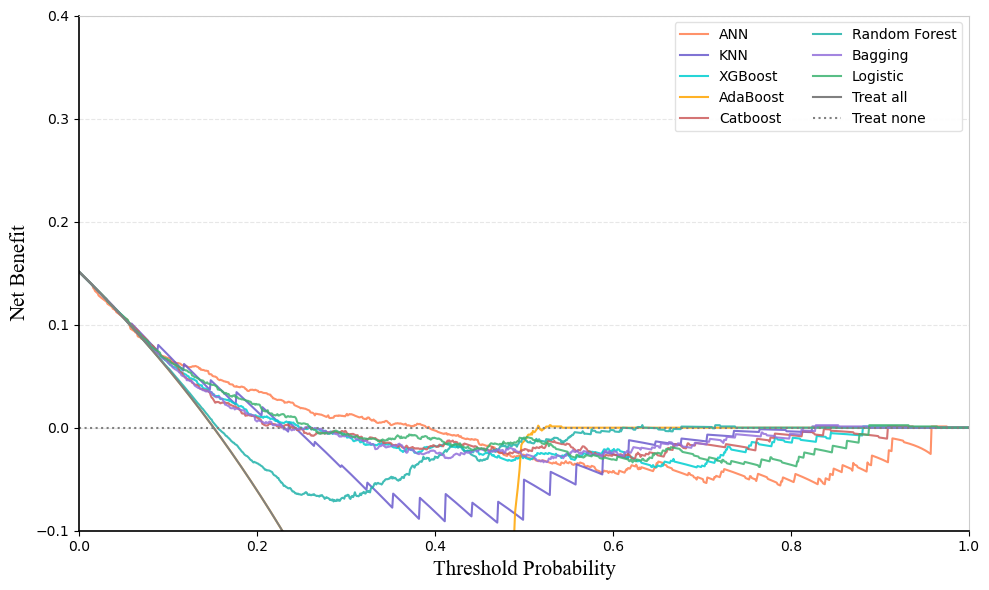

In [32]:
# 外部数据DCA曲线
fig, ax = plt.subplots(figsize=(10, 6))  # 调整图表大小

# 定义与内部数据一致的颜色方案（确保模型颜色对应）
colors = [
    '#FF7F50',  # 珊瑚红 - ANN
    '#6A5ACD',  # 石板蓝 - KNN
    '#00CED1',  # 暗青色 - XGBoost
    '#FFA500',  # 橙色 - AdaBoost
    '#CD5C5C',  # 印度红 - Catboost
    '#20B2AA',  # 亮钢蓝 - Random Forest
    '#9370DB',  # 暗紫罗兰色 - Bagging
    '#3CB371',  # MediumSeaGreen - Logistic
]

# 绘制模型曲线
models = [
    (net_benefit_model_external_ANN, 'ANN'),
    (net_benefit_model_external_KNN, 'KNN'),
    (net_benefit_model_external_XGBoost, 'XGBoost'),
    (net_benefit_model_external_AdaBoost, 'AdaBoost'),
    (net_benefit_model_external_Catboost, 'Catboost'),
    (net_benefit_model_external_Random_Forest, 'Random Forest'),
    (net_benefit_model_external_Bagging, 'Bagging'),
    (net_benefit_model_external_Logistic, 'Logistic')
]

# 使用循环绘制模型曲线
for i, (model, label) in enumerate(models):
    ax.plot(thresh_group, model, color=colors[i], label=label, lw=1.5, alpha=0.85)  # 增加线宽和透明度

# 绘制参考线
ax.plot(thresh_group, net_benefit_all_external, color='#808080', label='Treat all', lw=1.5)  # 深灰色
ax.plot((0, 1), (0, 0), color='#808080', linestyle=':', label='Treat none', lw=1.5)

# 图表配置
ax.set_xlim(0, 1)
ax.set_ylim(-0.1, 0.4)  # 调整Y轴范围与内部图匹配
ax.set_xlabel(
    xlabel='Threshold Probability',
    fontdict={'family': 'Times New Roman', 'fontsize': 15}
)
ax.set_ylabel(
    ylabel='Net Benefit',
    fontdict={'family': 'Times New Roman', 'fontsize': 15}
)

# 美化图表边框
ax.spines['right'].set_color((0.8, 0.8, 0.8))
ax.spines['top'].set_color((0.8, 0.8, 0.8))
ax.spines['left'].set_linewidth(1.2)  # 增强左边框
ax.spines['bottom'].set_linewidth(1.2)  # 增强下边框

# 优化图例（两列显示，更紧凑）
legend = ax.legend(loc='upper right', frameon=True, ncol=2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('#e0e0e0')
frame.set_alpha(0.95)  # 图例背景半透明

# 添加网格线增强可读性
ax.grid(True, axis='y', linestyle='--', alpha=0.3)

# 标题（可选，取消注释添加标题）
#plt.title('Decision Curve Analysis (External Validation)', fontsize=16)

plt.tight_layout()  # 确保布局紧凑
#plt.savefig('D:/JupyterLab/AKI/Result/Fig/DCA_external5.27.pdf', 
#           format='pdf', dpi=800, bbox_inches='tight')
plt.show()

### 定义8个模型

In [25]:
# 设置字体为 Arial
plt.rcParams['font.family'] = 'Arial'

# 定义要评估的模型列表（仅这8个）
selected_models = {
    "AdaBoost": ADB_model,
    "Bagging": Bagging_model,
    "ANN": ANN_model,
    "Random Forest": RF_model,
    "KNN": KNN_model,
    "CatBoost": Catboost_model,
    "Logistic": Logistic_model,
    "XGBoost": XGB_model
}

In [26]:
# 生成预测结果（仅内部和外部数据的这8个模型）
predictions_internal_selected = {}
predictions_external_selected = {}

for model_key, model in selected_models.items():
    print(f"Processing model: {model_key}")
    try:
        # 内部数据预测
        if hasattr(model, "predict_proba"):
            predictions_internal_selected[model_key] = model.predict_proba(X_test)[:, 1]
        else:
            predictions_internal_selected[model_key] = model.decision_function(X_test)

        # 外部数据预测
        if hasattr(model, "predict_proba"):
            predictions_external_selected[model_key] = model.predict_proba(X_test_external)[:, 1]
        else:
            predictions_external_selected[model_key] = model.decision_function(X_test_external)
    except Exception as e:
        print(f"Error occurred while processing model {model_key}: {e}")
        continue

Processing model: AdaBoost
Processing model: Bagging
Processing model: ANN
Processing model: Random Forest
Processing model: KNN
Processing model: CatBoost
Processing model: Logistic
Processing model: XGBoost


In [28]:
#安全归一化函数（确保预测值在[0,1]范围内）
def safe_normalize(pred):
    pred = np.array(pred)
    if pred.min() == pred.max():  # 所有值相同的情况
        return np.clip(pred, 0, 1)
    return (pred - pred.min()) / (pred.max() - pred.min())

In [32]:
# 打印内部数据的 Brier Score
print("Internal Data Brier Scores:")
for model_key, score in brier_scores_internal.items():
    print(f"{model_key}: {score:.4f}")

Internal Data Brier Scores:
AdaBoost: 0.1891
Bagging: 0.1767
ANN: 0.1805
Random Forest: 0.1805
KNN: 0.1947
CatBoost: 0.1770
Logistic: 0.1806
XGBoost: 0.1757


### 绘制外部数据校准曲线

### Brier Score

In [32]:
# 打印外部数据的 Brier Score
print("External Data Brier Scores:")
for model_key, score in brier_scores_external.items():
    print(f"{model_key}: {score:.4f}")

External Data Brier Scores:
AdaBoost: 0.1669
Bagging: 0.1396
ANN: 0.1316
Random Forest: 0.1735
KNN: 0.1761
CatBoost: 0.1351
Logistic: 0.1331
XGBoost: 0.1391


## Variable Importance

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import os
import pandas as pd
from sklearn.inspection import permutation_importance

### 计算特征重要性函数

In [33]:
def variableImportance(model, X, y):
    result = permutation_importance(
        model, X, y, n_repeats=10, random_state=42, n_jobs=4
    )
    return result.importances_mean

### 构建特征重要性矩阵

In [34]:
imp = pd.DataFrame(
    {
        model_name: variableImportance(model, X_test, y_test)
        for model_name, model in selected_models.items()
    },
    index=column_name
)
imp['Average'] = imp.mean(axis=1)

## 可视化特征重要性函数

In [35]:
def plotFeatureImportance(a):
    mpl.rcParams['figure.dpi'] = 300
    a = a.sort_values(by=['Average'], ascending=False)
    fig, ax = plt.subplots(figsize=(8, 10))

    def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
        new_cmap = colors.LinearSegmentedColormap.from_list(
            'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
            cmap(np.linspace(minval, maxval, n)))
        return new_cmap

    im = ax.imshow(a[list(selected_models.keys()) + ['Average']],
                   cmap=truncate_colormap(cm.get_cmap("hot"), minval=0.4, maxval=1), norm=colors.SymLogNorm(1e-3))
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Permutation Feature Importance", rotation=-90, va="bottom")
    cbar.set_ticks([0.1, 0.01, 0.001, 0, -0.001])
    cbar.set_ticklabels(['10', "1", "0.1", 0, '-1'])

    ax.set_yticks(np.arange(len(a)))
    ax.set_xticks(np.arange(len(a.columns)))
    ax.set_xticklabels(list(selected_models.keys()) + ['Average'])
    ax.set_yticklabels(a.index)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fig.tight_layout()

### 调用可视化函数展示结果

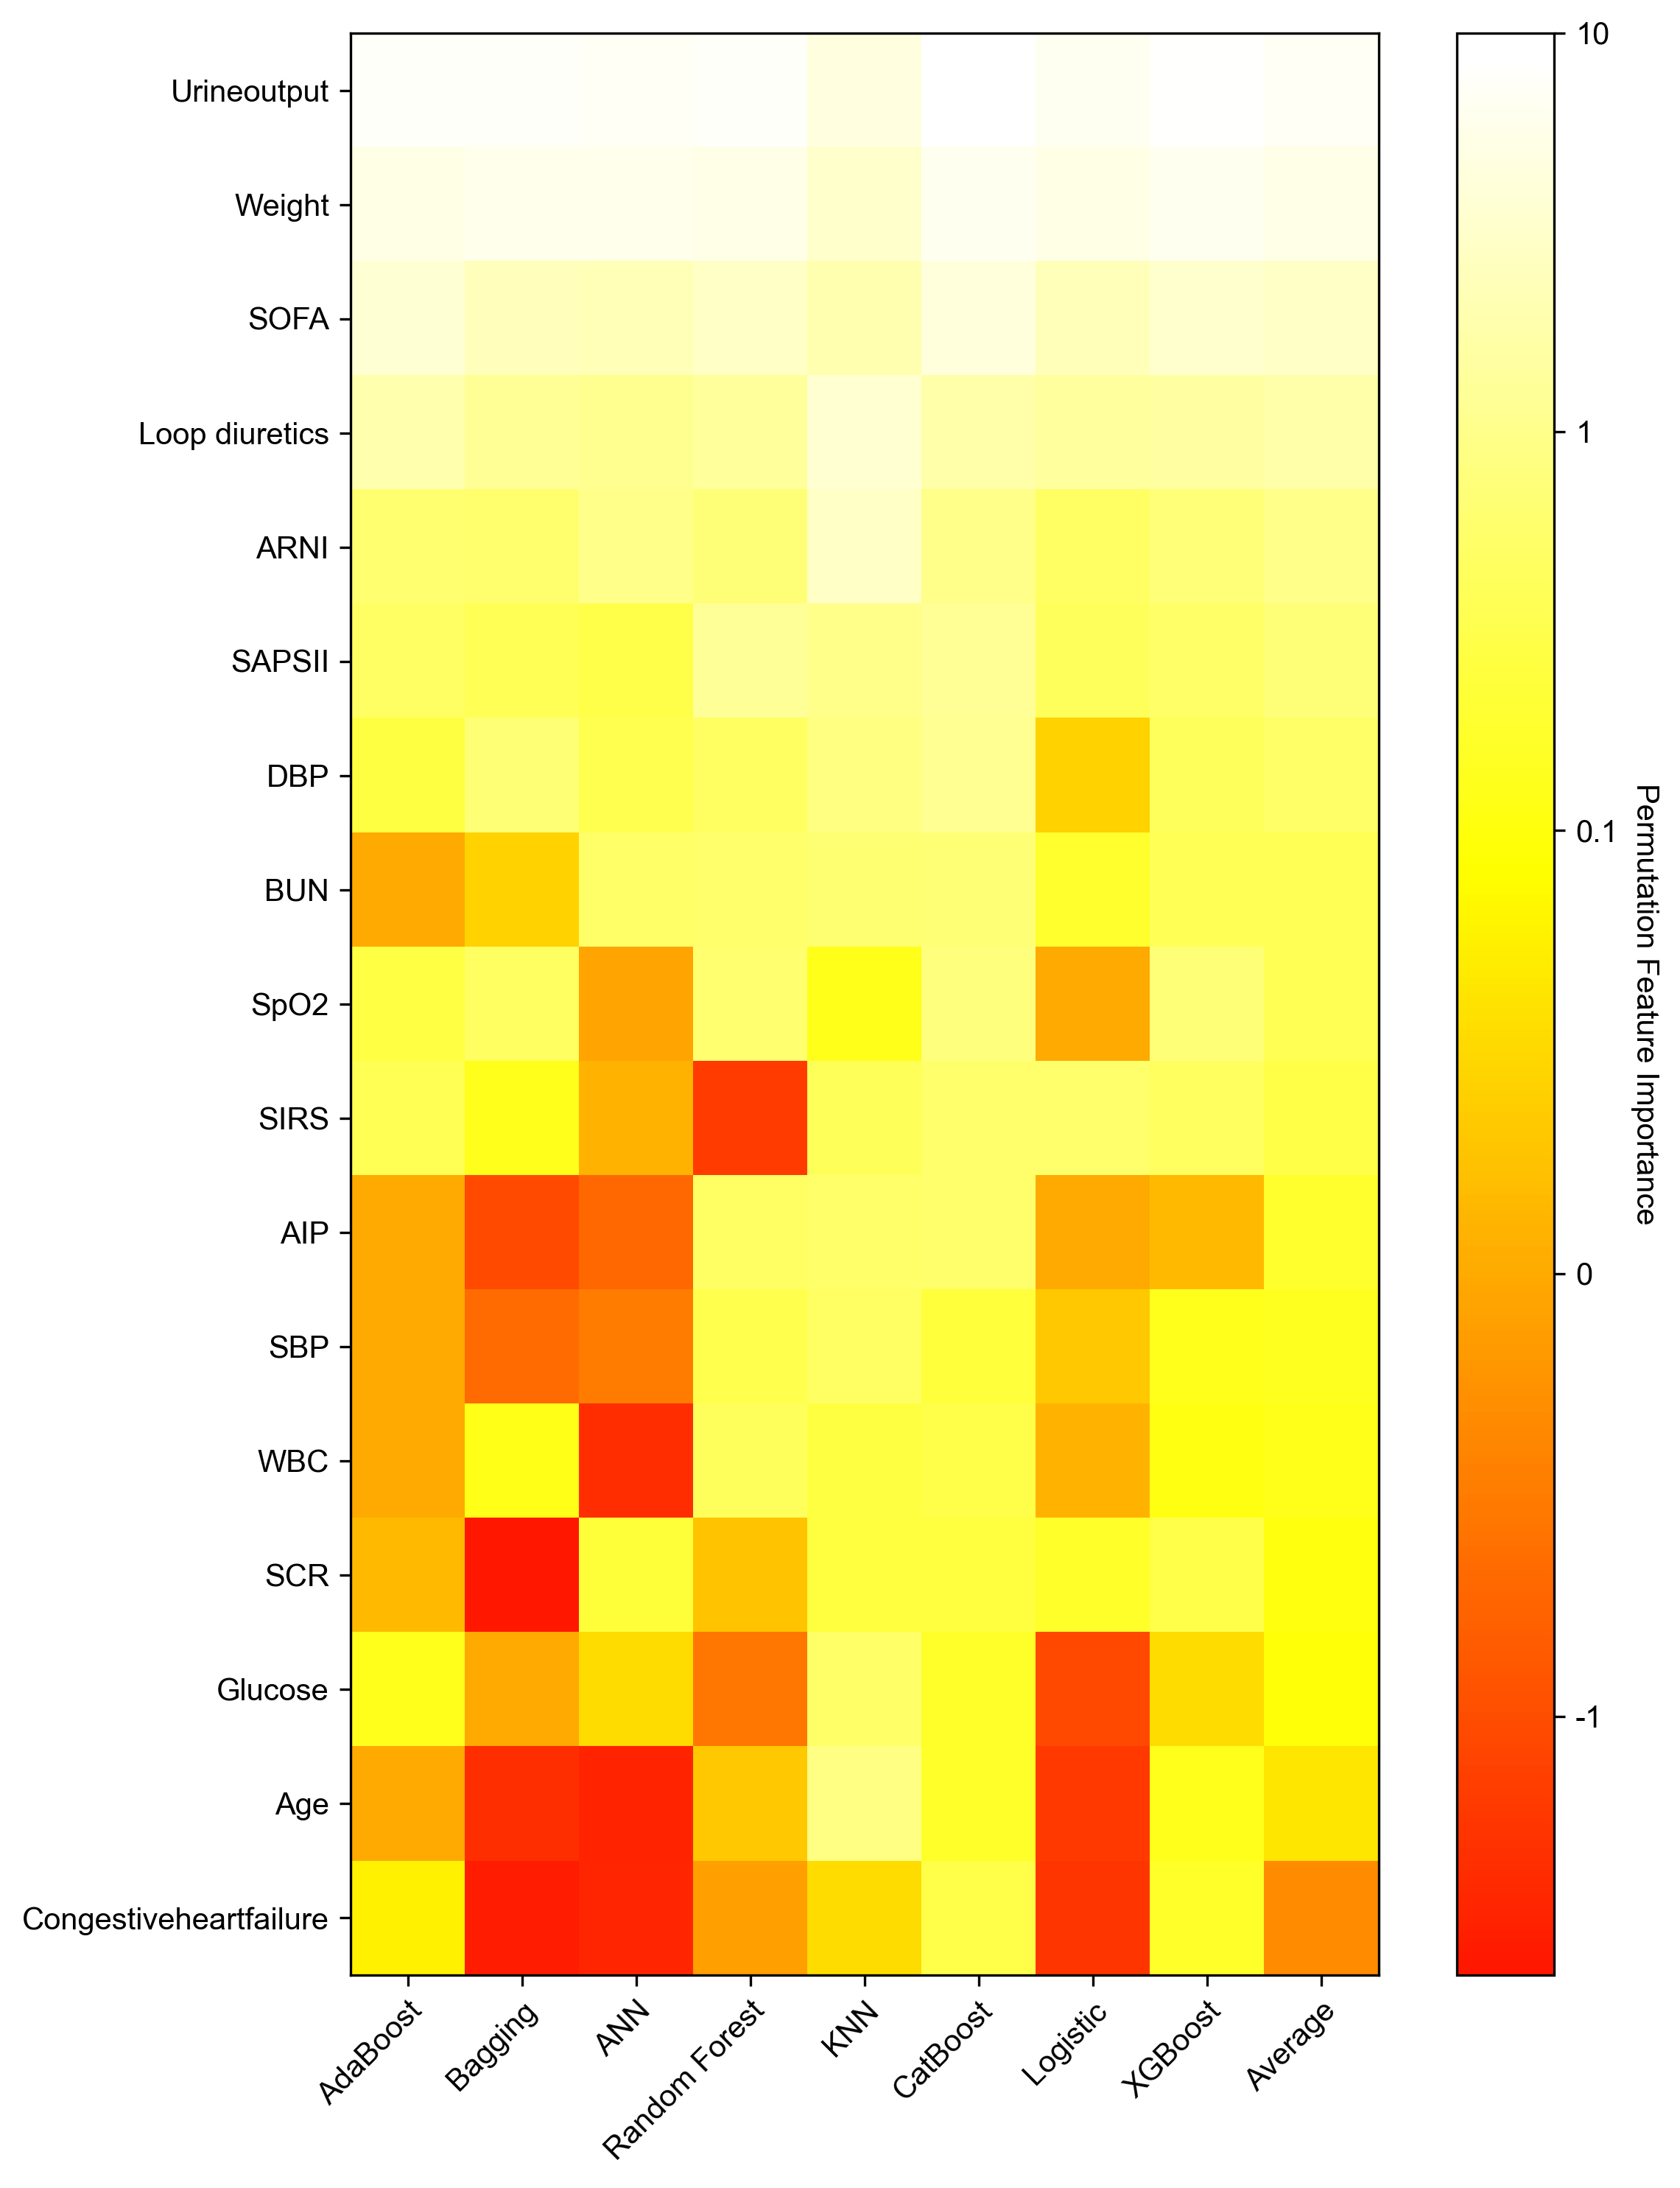

In [36]:
# 调用函数
plotFeatureImportance(imp)
plt.savefig('D:/JupyterLab/AKI/Result/Fig/feature_importance5.27.pdf', 
           format='pdf', dpi=300, bbox_inches='tight')

## Shap

In [11]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### XGBOOST

In [35]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import shap
import matplotlib.pyplot as plt
import numpy as np

# 定义预测函数
def XGBoost_prediction(X):
    return XGB_model.predict(X)

# 创建SHAP解释器
#XGBoost_explainer = shap.TreeExplainer(XGBoost_prediction, X_train)
XGBoost_explainer = shap.TreeExplainer(XGB_model)
XGBoost_shap_values = XGBoost_explainer.shap_values(X_train)
# 计算SHAP值
XGBoost_shap_values = XGBoost_explainer(X_train)

# 获取特征总数
num_features = X_train.shape[1]

# 绘制SHAP摘要图
plt.figure(figsize=(10, 0.5 * num_features))
shap.summary_plot(
    XGBoost_shap_values.values,  # 提取SHAP值
    X_train,
    max_display=num_features,
    show=False
)

# 获取坐标轴并设置X轴范围和刻度
ax = plt.gca()
ax.set_xlim(-0.6, 0.6)  # 强制设置X轴范围为-0.6到0.6
ticks = np.arange(-0.6, 0.6 + 0.2, 0.2)  # 生成-0.6到0.6、间隔0.2的刻度
ax.set_xticks(ticks)
ax.set_xticklabels([f"{tick:.1f}" for tick in ticks], rotation=0, fontsize=8)

# 移除网格线
ax.grid(False)  # 关闭X轴和Y轴网格线
ax.yaxis.grid(False)  # 额外确保Y轴网格线也关闭

plt.savefig(
    "D:/JupyterLab/AKI/Result/Fig/XGBoost_shap_summary_all_features610.pdf",
    format="pdf",
    dpi=800,
    bbox_inches="tight"
)
plt.close()
plt.show()

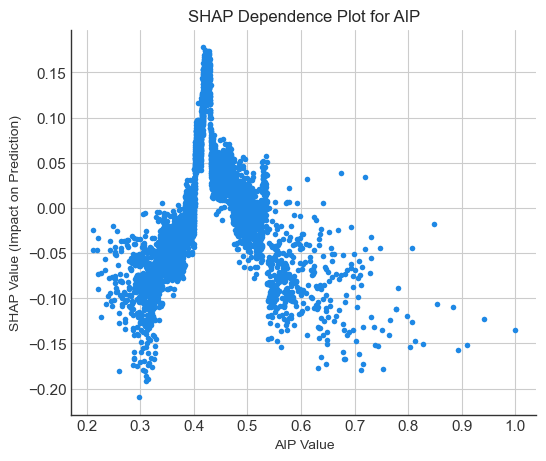

In [36]:
# 绘制AIP特征的SHAP依赖图（需确保"AIP"是X_train中的列名）
shap.dependence_plot(
    "AIP",                            # 指定特征名称（必须与X_train列名一致）
    XGBoost_shap_values.values,       # SHAP值矩阵
    X_train,                          # 训练数据集（需包含AIP列）
    interaction_index=None,           # 可指定交互特征（若为空，SHAP自动选择）
    show=False                        # 关闭自动显示，便于保存高清图
)

# 自定义图表样式
plt.title("SHAP Dependence Plot for AIP", fontsize=12)
plt.xlabel("AIP Value", fontsize=10)
plt.ylabel("SHAP Value (Impact on Prediction)", fontsize=10)

# 保存为PDF
plt.savefig(
    "D:/JupyterLab/AKI/Result/Fig/XGBoost_shap_AIP.pdf",
    format="pdf",
    dpi=300,
    bbox_inches='tight'
)

# 显示图表
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, cohen_kappa_score
import numpy as np
import pandas as pd

In [ ]:
#定义计算指标的函数
def calculate_metrics(y_true, y_pred_probs):
    # 根据预测概率生成类别预测
    if np.min(y_pred_probs) < 0:  # 决策函数值可能有负数
        y_pred = (y_pred_probs >= 0).astype(int)
    else:  # 概率值在0-1之间
        y_pred = (y_pred_probs >= 0.5).astype(int)
    
    metrics = {}
    
    # 基础指标
    metrics['错误率'] = 1 - accuracy_score(y_true, y_pred)
    metrics['准确率'] = accuracy_score(y_true, y_pred)
    metrics['精度'] = precision_score(y_true, y_pred)
    metrics['召回率'] = recall_score(y_true, y_pred)
    metrics['F1值'] = f1_score(y_true, y_pred)
    
    # AUC
    metrics['AUC值'] = roc_auc_score(y_true, y_pred_probs)
    
    # 科恩Kappa
    metrics['科恩得分'] = cohen_kappa_score(y_true, y_pred)
    
    # 混淆矩阵
    cm = confusion_matrix(y_true, y_pred)
    metrics['混淆矩阵'] = f"TN={cm[0,0]}, FP={cm[0,1]}, FN={cm[1,0]}, TP={cm[1,1]}"
    
    return metrics

# 初始化结果存储
internal_results = {}
external_results = {}

# 处理内部测试集
for model_key, preds in predictions.items():
    try:
        # 计算指标
        internal_results[model_key] = calculate_metrics(
            y_test, 
            preds
        )
    except Exception as e:
        print(f"计算模型 {model_key} 的内部指标时出错: {str(e)}")
        internal_results[model_key] = {"错误": str(e)}

# 处理外部验证集
for model_key, preds in predictions_external.items():
    try:
        # 计算指标
        external_results[model_key] = calculate_metrics(
            y_test_external, 
            preds
        )
    except Exception as e:
        print(f"计算模型 {model_key} 的外部指标时出错: {str(e)}")
        external_results[model_key] = {"错误": str(e)}

# 将结果转换为DataFrame以便查看
internal_df = pd.DataFrame(internal_results).T
external_df = pd.DataFrame(external_results).T

# 打印内部测试集结果
print("="*50)
print("内部测试集评估结果")
print("="*50)
print(internal_df)

# 打印外部验证集结果
print("\n" + "="*50)
print("外部验证集评估结果")
print("="*50)
print(external_df)

内部测试集评估结果
                             错误率       准确率        精度       召回率       F1值  \
MLP                     0.268829  0.731171  0.714444  0.734857  0.724507   
AdaBoost                 0.26718   0.73282  0.726954     0.712    0.7194   
Bagging                  0.26608   0.73392  0.731361  0.706286  0.718605   
Elastic Net Regression   0.26773   0.73227  0.730952  0.701714  0.716035   
ANN                     0.272677  0.727323  0.710322  0.731429  0.720721   
Random Forest            0.26608   0.73392  0.735826  0.697143  0.715962   
KNN                     0.302914  0.697086  0.660079  0.763429  0.708002   
Catboost                0.253986  0.746014  0.746126  0.715429  0.730455   
Logistic                0.272677  0.727323   0.72426  0.699429  0.711628   
Ridge                   0.268829  0.731171  0.726526  0.707429   0.71685   
SGD                      0.26773   0.73227  0.771709  0.629714  0.693518   
SVM                     0.259483  0.740517  0.737338  0.715429  0.726218   
XG